Atalov S. (TSI AUCA)

Data Collection and Processing Technologies

---
# Lab1. Car Price Prediction
---

<div>
<img src="attachment:image.png" width="500"/>
</div>

### Task:

#### 1. Scrape the given web-page (see below) with the car brand/manufacturer you want (for example BMW, Toyota etc.). As a result you have to create a DataFrame object with cars ads, with columns:

- car model (модель машины)
- year of production (год производства)
- engine volume (объем двигателя)
- mileage (пробег)
- fuel (вид топлива)
- gearbox mechanism (механизм коробки передач)
- steering wheel location (расположение руля (левый/правый))
- color (цвет)
- body type (тип кузова (седан, универсал и т.д.))
- location (city) (локация авто, город)
- price in USD (цена в долларах США)

url: `https://www.mashina.kg/`

#### 2. Prepare data for modelling.


- change the numeric columns to int or float (if object type)
- handling missing values `(Работа с пропущенными значениями, заполнение средним, модой. Либо, например, зависимость пробега от года выпуска)`
- working with categorical data (Ordinal and One-Hot Encodings) `(1 и 0, либо dummies. Например, расположение руля - левый: 0, правый: 1. А когда у нас вариантов больше, то необходимо использовать dummies)`

#### 3. Build a model (Linear Regression) for car price prediction. Show the score and coefficients. Interpret the coefficients. Answer to the given questions.

`X = all features, excluding the price`

`y = price in USD`

1. How does the year of car manufacture affect the price of the car? (coefficient of `Year` in equation)
2. How strongly does the mileage of the car affect the car? (coefficient of `Mileage` in equation)
3. Does the location of the steering wheel affect the cost? (coefficient of `Location` in equation)
4. Does the engine volume affect the cost? (coefficient of `Engine volume` in equation)

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests



In [2]:
base_url = "https://m.mashina.kg/search/all/?region=all&page="

data = []

In [3]:
for page in range(1, 4):
    url = base_url + str(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    cars = soup.find_all('div', class_='list-item')

    for car in cars:
        model = car.find('h2').text.strip()
        price = car.find('div', class_='block price').text.split('$')[1].strip().split('\n')[0]
        price = int(price.replace(' ', ''))
        year = car.find('p', class_='year-miles').text.strip().split(',')[0].split()[0]
        year = int(year)
        engine_vol = car.find('p', class_='year-miles').text.strip().split(',')[1].split()[0] if len(car.find('p', class_='year-miles').text.strip().split(','))==3 else None 
        engine_vol = float(engine_vol) if isinstance(engine_vol, int or float) else engine_vol
        gearbox = car.find('p', class_='year-miles').text.strip().split(',')[-1]
        body_type = car.find('p', class_='body-type').text.strip().split(',')[0]
        fuel = car.find('p', class_='body-type').text.strip().split(',')[-1]
        steering_wheel = car.find('p', class_='volume').text.strip().split(',')[0]
        mileage = car.find('p', class_='volume').text.strip().split(',')[-1].split('км')[0] if len(car.find('p', class_='volume').text.strip().split(','))==2 else None
        mileage = int(mileage.replace(' ', '')) if isinstance(mileage, str) else mileage
        location = car.find('p', class_='city').text.strip().split('\n')[0]

        data.append([model, year, engine_vol, mileage, fuel, gearbox, steering_wheel, body_type, location, price])


        print(mileage)

50000
290000
105000
300000
56000
8400
252000
114000
120000
178000
91000
77000
135000
12
68200
160934
51000
24152
15000
128000


AttributeError: 'NoneType' object has no attribute 'text'

In [4]:

cols = ['Model', 'Year', 'Engine Volume', 'Mileage', 'Fuel', 'Gearbox', 'Steering Wheel', 'Body Type', 'City', 'Price in usd']
df = pd.DataFrame(data, columns=cols)

In [5]:
df

,Model,Year,Engine Volume,Mileage,Fuel,Gearbox,Steering Wheel,Body Type,City,Price in usd
0,Mercedes-Benz A-Класс,2022,2,18000.0,бензин,робот,руль слева,седан,Бишкек,28500
1,Toyota Camry,2012,2.5,255885.0,гибрид,вариатор,руль слева,седан,Бишкек,14400
2,BMW M3,2021,3,32000.0,бензин,автомат,руль слева,седан,Бишкек,85000
3,Toyota Land Cruiser Prado,2022,2.7,70000.0,бензин,автомат,руль слева,внедорожник 5 дв.,Бишкек,58000
4,Kia Morning,2017,1,206437.0,газ,автомат,руль слева,хэтчбек 5 дв.,Бишкек,8350
5,Mercedes-Benz S-Класс,2010,5.5,230000.0,бензин,автомат,руль слева,седан,Бишкек,21500
6,Land Rover Range Rover,2018,4.4,123000.0,дизель,автомат,руль слева,внедорожник 5 дв.,Бишкек,61500
7,Hyundai Palisade,2022,2.2,33000.0,дизель,автомат,руль слева,внедорожник 5 дв.,Бишкек,45000
8,Hyundai Santa Fe,2019,2.4,156106.0,бензин,автомат,руль слева,внедорожник 5 дв.,Бишкек,19000
9,BMW i4,2023,None,15000.0,электро,автомат,руль слева,лифтбек,Бишкек,100000


In [6]:
df['Engine Volume'] = df['Engine Volume'].fillna(df['Engine Volume'].mode()[0])
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
df = df.drop(columns=['Model'])



In [7]:
df = pd.get_dummies(df, columns=['Fuel', 'Gearbox', 'Steering Wheel', 'Body Type', 'City'])

In [8]:
df.isnull().sum()

Year                           0
Engine Volume                  0
Mileage                        0
Price in usd                   0
Fuel_ бензин                   0
Fuel_ газ                      0
Fuel_ гибрид                   0
Fuel_ дизель                   0
Fuel_ электро                  0
Gearbox_ автомат               0
Gearbox_ вариатор              0
Gearbox_ механика              0
Gearbox_ робот                 0
Steering Wheel_руль слева      0
Body Type_внедорожник 5 дв.    0
Body Type_купе                 0
Body Type_лифтбек              0
Body Type_седан                0
Body Type_хэтчбек 5 дв.        0
City_Бишкек                    0
City_Нарын                     0
City_Ош                        0
City_Сокулук                   0
dtype: int64

In [9]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts


In [10]:
linreg = LinearRegression()


In [11]:
df

,Year,Engine Volume,Mileage,Price in usd,Fuel_ бензин,Fuel_ газ,Fuel_ гибрид,Fuel_ дизель,Fuel_ электро,Gearbox_ автомат,...,Steering Wheel_руль слева,Body Type_внедорожник 5 дв.,Body Type_купе,Body Type_лифтбек,Body Type_седан,Body Type_хэтчбек 5 дв.,City_Бишкек,City_Нарын,City_Ош,City_Сокулук
0,2022,2,18000.000000,28500,True,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
1,2012,2.5,255885.000000,14400,False,False,True,False,False,False,...,True,False,False,False,True,False,True,False,False,False
2,2021,3,32000.000000,85000,True,False,False,False,False,True,...,True,False,False,False,True,False,True,False,False,False
3,2022,2.7,70000.000000,58000,True,False,False,False,False,True,...,True,True,False,False,False,False,True,False,False,False
4,2017,1,206437.000000,8350,False,True,False,False,False,True,...,True,False,False,False,False,True,True,False,False,False
5,2010,5.5,230000.000000,21500,True,False,False,False,False,True,...,True,False,False,False,True,False,True,False,False,False
6,2018,4.4,123000.000000,61500,False,False,False,True,False,True,...,True,True,False,False,False,False,True,False,False,False
7,2022,2.2,33000.000000,45000,False,False,False,True,False,True,...,True,True,False,False,False,False,True,False,False,False
8,2019,2.4,156106.000000,19000,True,False,False,False,False,True,...,True,True,False,False,False,False,True,False,False,False
9,2023,3,15000.000000,100000,False,False,False,False,True,True,...,True,False,False,True,False,False,True,False,False,False


In [12]:
X = df.copy()
y = X.pop('Price in usd')


In [13]:
X_train, X_test, y_train, y_test = tts(X,y, train_size=0.2)


In [14]:
X_test

,Year,Engine Volume,Mileage,Fuel_ бензин,Fuel_ газ,Fuel_ гибрид,Fuel_ дизель,Fuel_ электро,Gearbox_ автомат,Gearbox_ вариатор,...,Steering Wheel_руль слева,Body Type_внедорожник 5 дв.,Body Type_купе,Body Type_лифтбек,Body Type_седан,Body Type_хэтчбек 5 дв.,City_Бишкек,City_Нарын,City_Ош,City_Сокулук
0,2022,2,18000.000000,True,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
13,2019,1.6,247150.000000,False,False,False,True,False,False,False,...,True,True,False,False,False,False,True,False,False,False
57,2023,4,6900.000000,True,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,False,False
41,2013,5.5,157000.000000,True,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,False,False
18,2017,2,34600.000000,False,False,False,True,False,True,False,...,True,False,False,False,False,True,True,False,False,False
32,2011,2,166000.000000,False,True,False,False,False,True,False,...,True,False,False,False,True,False,True,False,False,False
7,2022,2.2,33000.000000,False,False,False,True,False,True,False,...,True,True,False,False,False,False,True,False,False,False
53,2018,2,80000.000000,False,False,False,True,False,True,False,...,True,False,False,False,True,False,True,False,False,False
1,2012,2.5,255885.000000,False,False,True,False,False,False,True,...,True,False,False,False,True,False,True,False,False,False
44,2008,5.7,120000.000000,True,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,False,False


In [15]:
linreg.fit(X_train, y_train)


LinearRegression()

In [16]:
linreg.score(X_test, y_test)

-0.32647709819605764

In [17]:
# xgb = XGBRegressor()
# xgb.fit(X_train, y_train)
# xgb.score(X_test, y_test)

In [18]:
random_reg = RandomForestRegressor()
random_reg.fit(X_train, y_train)
random_reg.score(X_test, y_test)


0.4345540192276248

In [19]:
df

,Year,Engine Volume,Mileage,Price in usd,Fuel_ бензин,Fuel_ газ,Fuel_ гибрид,Fuel_ дизель,Fuel_ электро,Gearbox_ автомат,...,Steering Wheel_руль слева,Body Type_внедорожник 5 дв.,Body Type_купе,Body Type_лифтбек,Body Type_седан,Body Type_хэтчбек 5 дв.,City_Бишкек,City_Нарын,City_Ош,City_Сокулук
0,2022,2,18000.000000,28500,True,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
1,2012,2.5,255885.000000,14400,False,False,True,False,False,False,...,True,False,False,False,True,False,True,False,False,False
2,2021,3,32000.000000,85000,True,False,False,False,False,True,...,True,False,False,False,True,False,True,False,False,False
3,2022,2.7,70000.000000,58000,True,False,False,False,False,True,...,True,True,False,False,False,False,True,False,False,False
4,2017,1,206437.000000,8350,False,True,False,False,False,True,...,True,False,False,False,False,True,True,False,False,False
5,2010,5.5,230000.000000,21500,True,False,False,False,False,True,...,True,False,False,False,True,False,True,False,False,False
6,2018,4.4,123000.000000,61500,False,False,False,True,False,True,...,True,True,False,False,False,False,True,False,False,False
7,2022,2.2,33000.000000,45000,False,False,False,True,False,True,...,True,True,False,False,False,False,True,False,False,False
8,2019,2.4,156106.000000,19000,True,False,False,False,False,True,...,True,True,False,False,False,False,True,False,False,False
9,2023,3,15000.000000,100000,False,False,False,False,True,True,...,True,False,False,True,False,False,True,False,False,False


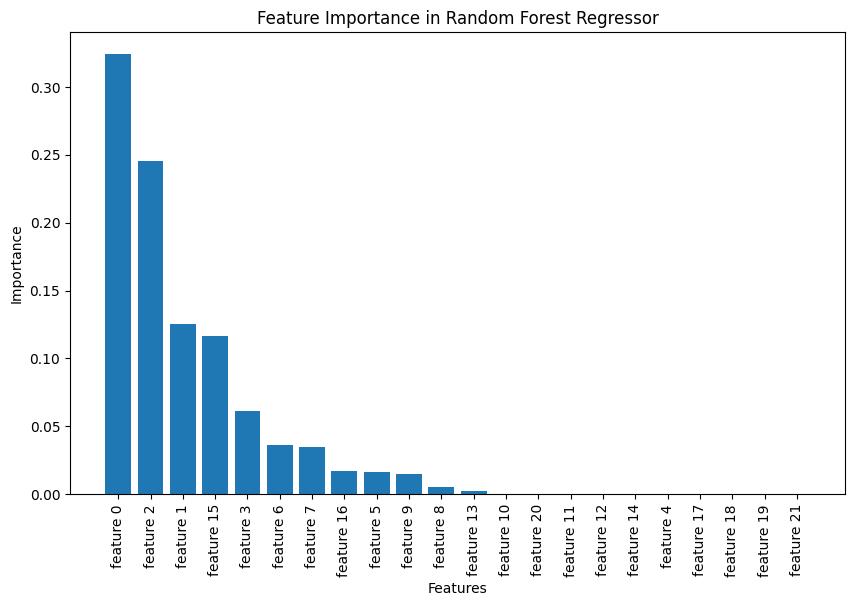

In [20]:
import matplotlib.pyplot as plt
import numpy as np

importances = random_reg.feature_importances_

feature_names = [f'feature {i}' for i in range(X_train.shape[1])]

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest Regressor")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

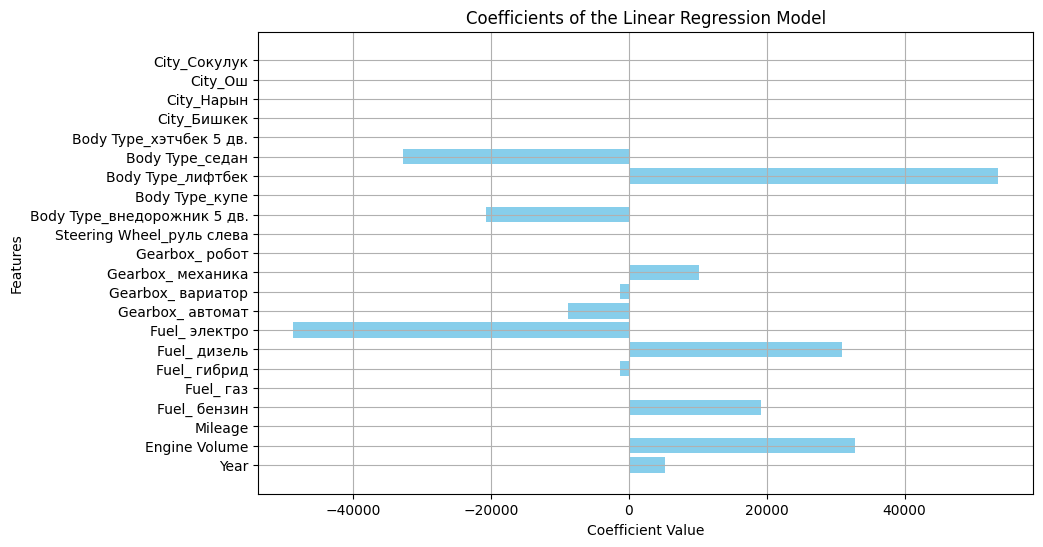

Intercept: -10507818.240188383


In [21]:
feature_names = X_train.columns

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, linreg.coef_, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficients of the Linear Regression Model')
plt.grid(True)
plt.show()

# Print intercept
print(f"Intercept: {linreg.intercept_}")

In [23]:
X_test

,Year,Engine Volume,Mileage,Fuel_ бензин,Fuel_ газ,Fuel_ гибрид,Fuel_ дизель,Fuel_ электро,Gearbox_ автомат,Gearbox_ вариатор,...,Steering Wheel_руль слева,Body Type_внедорожник 5 дв.,Body Type_купе,Body Type_лифтбек,Body Type_седан,Body Type_хэтчбек 5 дв.,City_Бишкек,City_Нарын,City_Ош,City_Сокулук
0,2022,2,18000.000000,True,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
13,2019,1.6,247150.000000,False,False,False,True,False,False,False,...,True,True,False,False,False,False,True,False,False,False
57,2023,4,6900.000000,True,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,False,False
41,2013,5.5,157000.000000,True,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,False,False
18,2017,2,34600.000000,False,False,False,True,False,True,False,...,True,False,False,False,False,True,True,False,False,False
32,2011,2,166000.000000,False,True,False,False,False,True,False,...,True,False,False,False,True,False,True,False,False,False
7,2022,2.2,33000.000000,False,False,False,True,False,True,False,...,True,True,False,False,False,False,True,False,False,False
53,2018,2,80000.000000,False,False,False,True,False,True,False,...,True,False,False,False,True,False,True,False,False,False
1,2012,2.5,255885.000000,False,False,True,False,False,False,True,...,True,False,False,False,True,False,True,False,False,False
44,2008,5.7,120000.000000,True,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,False,False


In [22]:
linreg.predict(X_test)

array([  51866.80926332,    4227.69357949,  127778.66786534,
         96901.60436643,   58483.75715119,  -60948.853259  ,
         70559.23040452,   22418.06731086,  -49984.61193305,
         84364.06481738,  105011.70410581,   66846.01391227,
         53722.13440807,  134261.08957569,   53750.66398939,
         68142.35033729,   40280.52466351,  111626.14449778,
          6789.80820212,   74251.1486558 ,   63714.1626111 ,
        107483.44643822,   43926.24375299,   58809.26189289,
        101508.82060704,   33655.98397969,   55655.87031409,
        -37260.46576661,  -31091.88084755,   67924.16352655,
         68233.35215089, -138167.00687679,   80906.88841374,
         31909.42819176, -134480.26195357,   36443.28286569,
         12493.93212488,   96304.98691944,  -12629.6623679 ,
         48492.15406087,  -32189.20576485,   -2365.35316378,
         33037.43966646,   83975.14431214,   76292.43582657,
         26583.09850996,  160182.33428624,   20588.4059659 ])